In [273]:
import simplejson as json 
import xml.etree.ElementTree as ET
import pandas as pd
from IPython.display import display, HTML

tree = ET.parse('/home/ubuntu/Documents/health/apple_health_export/export.xml')
root = tree.getroot() 

data = []
 

In [274]:
for elem in root:
    if elem.tag == "Record":
        d = elem.attrib
        r = {
            'type' : d['type'],
            'value' : d['value'],
            'date' : d['startDate']
            }
        data.append(r)
        

In [275]:
for t in types:
    print(t + '\n')
 


HKQuantityTypeIdentifierDietaryCalcium

HKQuantityTypeIdentifierBodyMass

HKQuantityTypeIdentifierDietaryPotassium

HKQuantityTypeIdentifierBloodPressureSystolic

HKQuantityTypeIdentifierDietaryEnergyConsumed

HKQuantityTypeIdentifierBloodGlucose

HKQuantityTypeIdentifierWaistCircumference

HKQuantityTypeIdentifierBloodPressureDiastolic

HKQuantityTypeIdentifierDietaryIron

HKQuantityTypeIdentifierBodyFatPercentage

HKQuantityTypeIdentifierLeanBodyMass

HKQuantityTypeIdentifierDietarySodium

HKQuantityTypeIdentifierDietaryVitaminC

HKQuantityTypeIdentifierDietaryFatSaturated

HKQuantityTypeIdentifierDietaryCarbohydrates

HKQuantityTypeIdentifierDietaryFiber

HKQuantityTypeIdentifierDietarySugar

HKQuantityTypeIdentifierStepCount

HKQuantityTypeIdentifierDietaryProtein

HKQuantityTypeIdentifierDietaryFatMonounsaturated

HKQuantityTypeIdentifierFlightsClimbed

HKQuantityTypeIdentifierDietaryFatTotal

HKQuantityTypeIdentifierDietaryFatPolyunsaturated

HKQuantityTypeIdentifierHeight

HKQua

In [276]:
df = pd.DataFrame(data=data)
df['value'] = pd.to_numeric(df['value'])

In [277]:
pd.DataFrame.set_index(df,"date",inplace=True)

In [278]:
cols = ["HKQuantityTypeIdentifierBloodPressureSystolic", 
        "HKQuantityTypeIdentifierBloodGlucose", "HKQuantityTypeIdentifierBloodPressureDiastolic"]
data = {}
for i in cols:
    d = df.loc[df['type'] == i]
    data[i] = d.sort_values(by='date', axis=0)



In [279]:
bloodPressure = pd.merge(data["HKQuantityTypeIdentifierBloodPressureSystolic"],data["HKQuantityTypeIdentifierBloodPressureDiastolic"],on="date")
bloodPressure.drop(["type_x", "type_y"],axis=1, inplace=True)
bloodPressure.rename(columns={'value_x': 'Systolic', 'value_y': 'Diastolic'}, inplace=True)
display(HTML(bloodPressure.to_html()))


,Systolic,Diastolic
date,,
2019-11-13 16:24:00 +0200,126.0,74.0
2019-11-15 16:24:00 +0200,104.0,78.0
2019-11-23 02:11:00 +0200,110.0,67.0
2019-11-26 17:02:00 +0200,123.0,92.0
2019-11-27 04:56:00 +0200,121.0,70.0
2019-12-19 09:06:00 +0200,135.0,90.0
2019-12-19 21:18:00 +0200,129.0,67.0
2019-12-20 16:17:00 +0200,123.0,68.0
2019-12-21 21:48:00 +0200,102.0,75.0


In [280]:
 bloodPressure.columns

Index(['Systolic', 'Diastolic'], dtype='object')

In [281]:
df.columns

Index(['type', 'value'], dtype='object')

In [282]:
bloodPressure.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 2019-11-13 16:24:00 +0200 to 2019-12-26 08:25:00 +0200
Data columns (total 2 columns):
Systolic     15 non-null float64
Diastolic    15 non-null float64
dtypes: float64(2)
memory usage: 360.0+ bytes


In [283]:
for k, v in data.items():
    display(HTML(v.to_html()))


,type,value
date,,
2019-11-13 16:24:00 +0200,HKQuantityTypeIdentifierBloodPressureDiastolic,74.0
2019-11-15 16:24:00 +0200,HKQuantityTypeIdentifierBloodPressureDiastolic,78.0
2019-11-23 02:11:00 +0200,HKQuantityTypeIdentifierBloodPressureDiastolic,67.0
2019-11-26 17:02:00 +0200,HKQuantityTypeIdentifierBloodPressureDiastolic,92.0
2019-11-27 04:56:00 +0200,HKQuantityTypeIdentifierBloodPressureDiastolic,70.0
2019-12-19 09:06:00 +0200,HKQuantityTypeIdentifierBloodPressureDiastolic,90.0
2019-12-19 21:18:00 +0200,HKQuantityTypeIdentifierBloodPressureDiastolic,67.0
2019-12-20 16:17:00 +0200,HKQuantityTypeIdentifierBloodPressureDiastolic,68.0
2019-12-21 21:48:00 +0200,HKQuantityTypeIdentifierBloodPressureDiastolic,75.0


,type,value
date,,
2019-11-13 16:24:00 +0200,HKQuantityTypeIdentifierBloodPressureSystolic,126.0
2019-11-15 16:24:00 +0200,HKQuantityTypeIdentifierBloodPressureSystolic,104.0
2019-11-23 02:11:00 +0200,HKQuantityTypeIdentifierBloodPressureSystolic,110.0
2019-11-26 17:02:00 +0200,HKQuantityTypeIdentifierBloodPressureSystolic,123.0
2019-11-27 04:56:00 +0200,HKQuantityTypeIdentifierBloodPressureSystolic,121.0
2019-12-19 09:06:00 +0200,HKQuantityTypeIdentifierBloodPressureSystolic,135.0
2019-12-19 21:18:00 +0200,HKQuantityTypeIdentifierBloodPressureSystolic,129.0
2019-12-20 16:17:00 +0200,HKQuantityTypeIdentifierBloodPressureSystolic,123.0
2019-12-21 21:48:00 +0200,HKQuantityTypeIdentifierBloodPressureSystolic,102.0


,type,value
date,,
2019-11-05 16:27:00 +0200,HKQuantityTypeIdentifierBloodGlucose,97.0
2019-11-13 16:26:00 +0200,HKQuantityTypeIdentifierBloodGlucose,100.0
2019-11-15 12:25:00 +0200,HKQuantityTypeIdentifierBloodGlucose,94.0
2019-11-18 00:47:00 +0200,HKQuantityTypeIdentifierBloodGlucose,97.0
2019-11-23 02:05:00 +0200,HKQuantityTypeIdentifierBloodGlucose,97.0
2019-11-23 02:05:00 +0200,HKQuantityTypeIdentifierBloodGlucose,97.0
2019-11-26 15:58:00 +0200,HKQuantityTypeIdentifierBloodGlucose,104.0
2019-12-01 03:14:00 +0200,HKQuantityTypeIdentifierBloodGlucose,100.0
2019-12-20 16:14:00 +0200,HKQuantityTypeIdentifierBloodGlucose,109.0


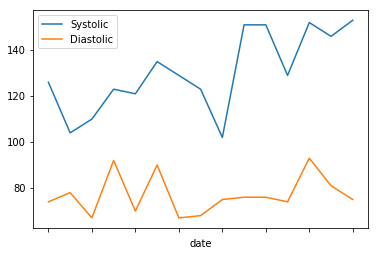

In [284]:
bloodPressure.plot()

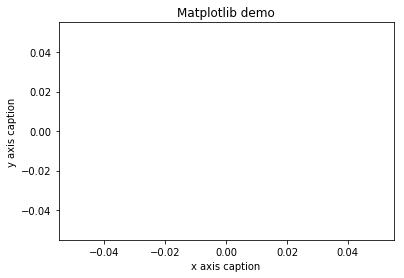

In [285]:
import numpy as np 
from matplotlib import pyplot as plt 

 
plt.title("Matplotlib demo") 
plt.xlabel("x axis caption") 
plt.ylabel("y axis caption") 
plt.plot(x=BloodPressureSystolic['date'],y=BloodPressureSystolic['value']) 
plt.show()

In [290]:
from plotly.offline import plot

import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Scatter(x=BloodPressureSystolic.index.values,y=BloodPressureSystolic['value'])],
    layout_title_text="BloodPressureSystolic"
)
fig.show()

In [287]:
d = df.loc[df['type'] == "HKQuantityTypeIdentifierBloodGlucose"]
BloodGlucose = d.sort_values(by='date', axis=0)           

In [289]:
from plotly.offline import plot

import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Scatter(x=BloodGlucose.index.values,y=BloodGlucose['value'])],
    layout_title_text="BloodGlucose"
)
fig.show()